# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Hamza Pratama
- **Email:** hamzapratama000@gmail.com
- **ID Dicoding:** hamzaapratama

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi penyewaan sepeda berdasarkan musim dalam dua tahun terakhir?
- Apakah terdapat korelasi antara kondisi cuaca dengan jumlah penyewaan sepeda per hari?
- Bagaimana tren penggunaan sepeda dalam satu tahun, apakah tahun 2011 atau 2012 yang lebih tinggi penggunaannya?


## Import Semua Packages/Library yang Digunakan

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

**Load data dari tabel hour**

In [97]:
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Load data dari tabel day**

In [98]:
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Tabel hour memiliki 17 kolom, yaitu instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, dan cnt.
- Tabel day memiliki 16 kolom, yaitu instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, dan cnt. Hampir sama dengan tabel hour, namun tabel day tidak memiliki kolom hr.

### Assessing Data

**Assessing hour_df**

**Mengecek tipe data hour_df**

In [99]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat satu kolom yang mempunyai tipe data yang tidak sesuai, yaitu dteday yang seharusnya datetime, bukan object. kemudian dari sana juga terlihat bahwa jumlah datanya lengkap, jadi tidak ada missing value.

**Mengecek apakah ada duplikasi data dan keanehan nilai statistik**

In [100]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada duplikasi data dan tidak ada keanehan pada nilai statistiknya.

**Assessing day_df**

**Mengecek tipe data day_df**

In [101]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat satu kolom yang mempunyai tipe data yang tidak sesuai, yaitu dteday yang seharusnya datetime, bukan object. kemudian dari sana juga terlihat bahwa jumlah datanya lengkap, jadi tidak ada missing value.

**Mengecek apakah ada duplikasi data dan keanehan nilai statistik**

In [102]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada duplikasi data dan tidak ada keanehan pada nilai statistiknya.

**Insight:**
- Pada data_df dan day_df jumlah datanya telah lengkap, sehingga tidak ada missing value.
- Kolom dteday pada hour_df dan day_df terdapat kesalahan tipe data yang seharusnya datetime, bukan object.
- Pada hour_df dan day_df tidak terdapat duplikasi data tidak ada inaccurate value.

### Cleaning Data

**1. Menghapus tabel yang tidak dibutuhkan**

In [103]:
del hour_df

Tabel tersebut dihapus karena tidak ada relevansi dengan pertanyaan bisnis yang sudah ditetapkan.

**2. Menghapus beberapa kolom yang tidak akan digunakan**

In [104]:
drop_col = ['instant', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,weathersit,cnt
0,2011-01-01,1,0,1,2,985
1,2011-01-02,1,0,1,2,801
2,2011-01-03,1,0,1,1,1349
3,2011-01-04,1,0,1,1,1562
4,2011-01-05,1,0,1,1,1600


Berdasarkan pertanyaan bisnis yang ada, maka untuk kolom yang akan didrop yaitu:
- instant: Karena indeks catatan ini tidak memberikan informasi tambahan yang berguna
- holiday, weekday, workingday, temp, atemp, hum, casual, registered: Tidak ada pertanyaan yang berkorelasi dengan variabel tersebut



**3. Mengubah beberapa detil kolom**

In [105]:
#mengubah nama kolom
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit' : 'weather',
    'cnt': 'count'
}, inplace = True)

day_df.head()

,dateday,season,year,month,weather,count
0,2011-01-01,1,0,1,2,985
1,2011-01-02,1,0,1,2,801
2,2011-01-03,1,0,1,1,1349
3,2011-01-04,1,0,1,1,1562
4,2011-01-05,1,0,1,1,1600


pengubahan tersebut saya lakukan untuk memudahkan pembacaan kolom

**4. Mengubah angka menjadi keterangan**

In [106]:
# Mengubah angka menjadi keterangan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weather'] = day_df['weather'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

**5. Memperbaiki tipedata dateday yang masih object ke datetime dan mengubah tipe data season, year, month, dan weather menjadi Categorical**

In [107]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['weather'] = day_df.weather.astype('category')

day_df.head()

,dateday,season,year,month,weather,count
0,2011-01-01,Spring,0,Jan,Misty/Cloudy,985
1,2011-01-02,Spring,0,Jan,Misty/Cloudy,801
2,2011-01-03,Spring,0,Jan,Clear/Partly Cloudy,1349
3,2011-01-04,Spring,0,Jan,Clear/Partly Cloudy,1562
4,2011-01-05,Spring,0,Jan,Clear/Partly Cloudy,1600


In [108]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dateday  731 non-null    datetime64[ns]
 1   season   731 non-null    category      
 2   year     731 non-null    category      
 3   month    731 non-null    category      
 4   weather  731 non-null    category      
 5   count    731 non-null    int64         
dtypes: category(4), datetime64[ns](1), int64(1)
memory usage: 15.2 KB


**Insight:**
- Tabel hour dan beberapa kolom pada tabel day yang tidak berkorelasi dengan pertanyaan bisnis telah dihapus.
- Mengubah kolom season, year, month, weather menjadi categorical dan memperbaiki tipe data dateday yang semula object menjadi datetime.

## Exploratory Data Analysis (EDA)

### Explorarasi Data day_df

**1. Kelompokkan penyewa sepeda berdasarkan musim**

In [109]:
day_df.groupby(by='season').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-109-a564179bbc84>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


count                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

Pengelompokan ini ditujukan untuk memudahkan dalam melihat pola penggunaan sepeda berdasarkan musim dalam dua tahun.

**2. Kelompokkan penyewa sepeda berdasarkan cuaca**

In [110]:
day_df.groupby(by='weather').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-110-9e57d7eb6f45>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather').agg({


count                           
                      max  min         mean      sum
weather                                             
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Pengelompokan ini ditujukan untuk melihat apakah ada korelasi antara kondisi cuaca dengan jumlah penyewaan sepeda perhari.

**3. Kelompokkan penyewa sepeda berdasarkan bulan**

In [111]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

<ipython-input-111-b05109ea9f0a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='month').agg({


count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

Pengelompokan ini dilakukan untuk melihat bagaimana tren penggunaan sepeda dalam satu tahun untuk nantinya dilihat, tahun mana yang memiliki tren penjualan lebih tinggi.

**Insight:**
- Para penyewa sepeda cenderung menyewa pada musim gugur, kemudian penyewa pada musim panas juga tergolong banyak, namun masih di bawah musim gugur. Di bawahnya lagi terdapat penyewa pada musim dingin. Dan hanya sedikit penyewa yang menyewa sepeda pada musim semi
- Terdapat korelasi signifikan antara kondisi cuaca dengan jumlah penyewaan sepeda. Para penyewa cenderung menyewa pada cuaca cerah atau mendung.  sangat sedikit yang menyewa ketika turun salju atau hujan, dan tidak ada yang menyewa ketika cuaca sedang buruk.
- Bulan yang mempunyai rata-rata penyewaan terbesar adalah Bulan Juni, sedangkan rata-rata penyewa terkecil ada pada Bulan Januari

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kondisi penyewaan sepeda berdasarkan musim dalam dua tahun terakhir?

<ipython-input-112-79c0a3d30518>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='count', data=season_usage, palette='coolwarm', hue=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When g

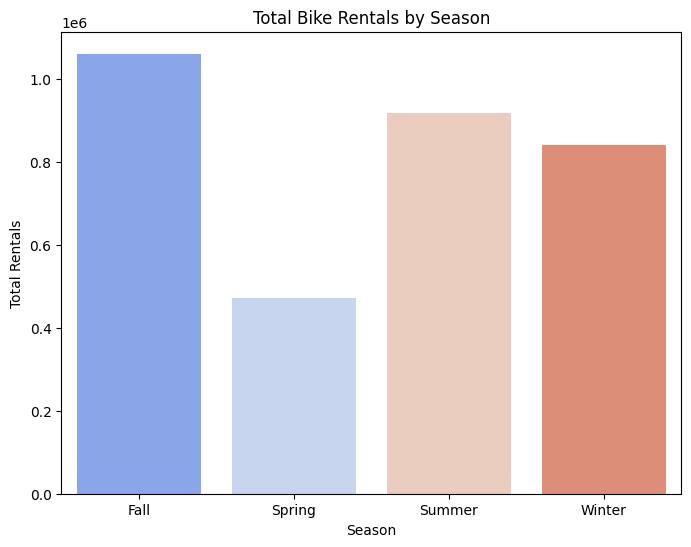

In [112]:
# Mengelompokkan dan menjumlahkan total penggunaan sepeda per musim
season_usage = day_df.groupby('season', observed=True)['count'].sum().reset_index()


# Membuat bar plot untuk penggunaan sepeda per musim
plt.figure(figsize=(8,6))
sns.barplot(x='season', y='count', data=season_usage, palette='coolwarm', hue=None)

plt.title('Total Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.show()

Penggunaan bar chart efektif untuk membandingkan total penyewaan sepeda berdasarkan musim

### Pertanyaan 2: Apakah terdapat korelasi antara kondisi cuaca dengan jumlah penyewaan sepeda perhari?

<ipython-input-113-e001c197374e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather', y='count', data=day_df, palette='viridis', hue=None)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

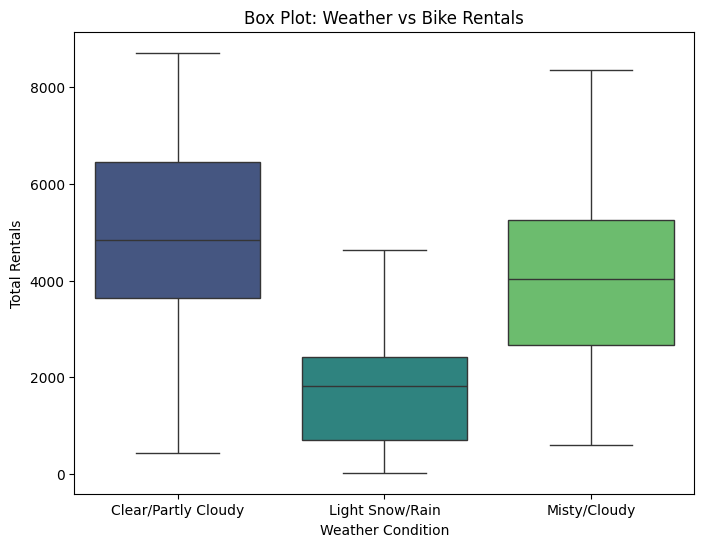

In [113]:
# Membuat box plot untuk distribusi penyewaan sepeda berdasarkan kondisi cuaca
plt.figure(figsize=(8,6))
sns.boxplot(x='weather', y='count', data=day_df, palette='viridis', hue=None)
plt.title('Box Plot: Weather vs Bike Rentals')
plt.xlabel('Weather Condition')
plt.ylabel('Total Rentals')
plt.show()

Box plot digunakan untuk menunjukkan distribusi penyewaan sepeda berdasarkan kondisi cuaca yang memberikan gambaran yang jelas tentang variasi, median, serta adanya outlier, memungkinkan analisis yang lebih mendalam tentang seberapa signifikan pengaruh cuaca terhadap penyewaan.

### Pertanyaan 3: Bagaimana tren penggunaan sepeda dalam satu tahun, apakah tahun 2011 atau 2012 yang tingkat penggunaannya lebih tinggi?

<ipython-input-114-b4b527c27874>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_usage = day_df.groupby(['year', 'month'])['count'].mean().unstack()


<Figure size 1000x600 with 0 Axes>

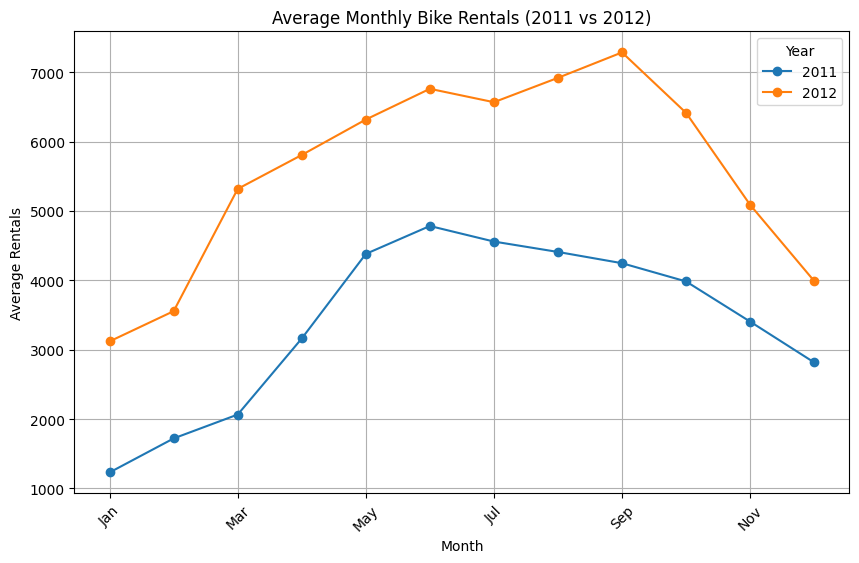

In [114]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

day_df['month'] = pd.Categorical(day_df['month'], categories=month_order, ordered=True)

# Mengelompokkan dan menghitung rata-rata penggunaan sepeda per bulan untuk setiap tahun
monthly_usage = day_df.groupby(['year', 'month'])['count'].mean().unstack()

# Membuat line plot untuk tren penggunaan sepeda di setiap bulan berdasarkan tahun
plt.figure(figsize=(10, 6))
monthly_usage.T.plot(kind='line', marker='o', linestyle='-', figsize=(10, 6))
plt.title('Average Monthly Bike Rentals (2011 vs 2012)')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)
plt.legend(title='Year', labels=['2011', '2012'])
plt.grid(True)
plt.show()

Line chart digunakan untuk menggambarkan tren penyewaan sepeda bulanan. Dengan menampilkan perubahan jumlah penyewaan sepanjang bulan dan tahun, line chart memudahkan identifikasi pola dan fluktuasi dalam penggunaan sepeda.

**Insight:**
- Berdasarkan visualisasi, penggunaan sepeda bervariasi berdasarkan musim. Musim gugur menunjukkan jumlah penyewaan sepeda tertinggi dibandingkan dengan musim lainnya, diikuti oleh musim panas, dan musim dingin. Penggunaan paling rendah terjadi pada musim semi.
- Berdasarkan visualisasi, dapat dilihat bahwa terdapat korelasi yang signifikan antara kondisi cuaca dengan jumlah penyewaan sepeda. Cuaca yang lebih cerah atau berawan ringan cenderung meningkatkan penyewaan sepeda, sedangkan cuaca buruk seperti hujan atau salju mengakibatkan penurunan drastis dalam penggunaan sepeda.
- Berdasarkan visualisasi, dapat dilihat bahwa tren penyewaan sepeda pada tahun 2012 jelas lebih tinggi baik dari Bulan Januari hingga Bulan Desember. Puncak penyewaan sepeda pada Tahun 2012 ada pada bulan September dan puncak penyewaan Tahun 2011 terjadi pada Bulan Juni

## Analisis Lanjutan (Opsional)

**RFM Analysis**

Disini dilakukan modifikasi RFM Analysis untuk menilai hari-hari berdasarkan:
- Recency: Hari terakhir penyewaan tinggi.
- Frequency: Frekuensi penyewaan dalam bulan
- Monetary: Total penyewaan sepeda pada hari tersebut.

In [115]:
# Recency (Hari terakhir dengan penyewaan besar)
latest_date = day_df['dateday'].max()
day_df['days_since_last_rental'] = (latest_date - day_df['dateday']).dt.days

# Frequency (Frekuensi penyewaan sepeda per bulan)
day_df['month_year'] = day_df['dateday'].dt.to_period('M')
frequency_df = day_df.groupby('month_year')['count'].count().reset_index()

# Monetary (Total penyewaan sepeda per hari)
monetary_df = day_df.groupby('dateday')['count'].sum().reset_index()

# Menggabungkan hasil RFM Analysis
rfm_df = day_df[['dateday', 'days_since_last_rental', 'count']].copy()
rfm_df = rfm_df.groupby('dateday').agg({
    'days_since_last_rental': 'min',
    'count': ['sum', 'count']
}).reset_index()

rfm_df.columns = ['dateday', 'recency', 'monetary', 'frequency']
rfm_df.head()

,dateday,recency,monetary,frequency
0,2011-01-01,730,985,1
1,2011-01-02,729,801,1
2,2011-01-03,728,1349,1
3,2011-01-04,727,1562,1
4,2011-01-05,726,1600,1


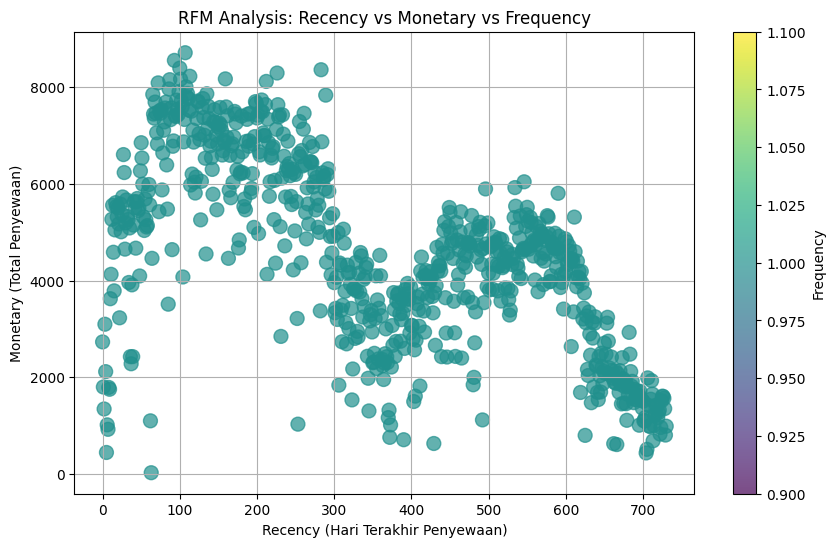

In [116]:
# Visualisasi RFM Score
plt.figure(figsize=(10,6))
plt.scatter(rfm_df['recency'], rfm_df['monetary'], c=rfm_df['frequency'], cmap='viridis', s=100, alpha=0.7)
plt.colorbar(label='Frequency')
plt.title('RFM Analysis: Recency vs Monetary vs Frequency')
plt.xlabel('Recency (Hari Terakhir Penyewaan)')
plt.ylabel('Monetary (Total Penyewaan)')
plt.grid(True)
plt.show()

## Conclusion

- Waktu terbaik untuk meningkatkan penyewaan sepeda adalah selama musim gugur dan musim panas, dan musim dingin sementara strategi khusus mungkin diperlukan untuk meningkatkan penggunaan selama musim semi.
- Layanan penyewaan sepeda cenderung paling diminati ketika cuaca sedang baik, seperti cerah atau berawan. Peningkatan penggunaan sepeda dapat difasilitasi dengan memberikan informasi cuaca kepada pengguna dan promosi penyewaan pada hari-hari cerah. Pada kondisi cuaca ekstrem, mungkin diperlukan kebijakan seperti penutupan layanan atau menyediakan alternatif transportasi yang lebih aman.
- Bulan September 2012 menandai puncak penggunaan yang signifikan, menunjukkan bahwa fokus promosi pada akhir musim panas hingga awal musim gugur dapat meningkatkan penyewaan Dibandingkan dengan 2011, tren di 2012 menunjukkan potensi pertumbuhan yang lebih besar di masa depan jika tren ini terus berlanjut. Program untuk mendorong penggunaan lebih lanjut selama bulan-bulan musim panas dapat lebih ditingkatkan.